In [ ]:
############################################################# IMPORTS ##########################################################

In [5]:
import numpy as np
import pandas as pd
import os
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from skimage import exposure
from sklearn.metrics import accuracy_score
import visualkeras
import datetime
np.random.seed(42)
import seaborn as sns
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
print('TensoFlow Version: ', tf.__version__)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline

TensoFlow Version:  2.13.0


In [ ]:
############################################################# Parameters ##########################################################

In [6]:
from google.colab import drive
drive.mount('/content/drive')
driveDir='/content/drive/MyDrive/ML/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
lables=pd.read_csv(driveDir+'data/labels.csv')
#lables.describe()
print("Total number of unique lables:",lables.count())
print(lables)
class_lables=lables["Name"]
class_lables=np.asarray(class_lables)

Total number of unique lables: ClassId    43
Name       43
dtype: int64
    ClassId                                               Name
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                   

In [65]:
IMG_HEIGHT=32
IMG_WIDTH=32
NUM_CATEGORIES=lables.count()

In [ ]:
############################################################# Load Model ##########################################################

In [66]:
#model load
cnnModelDir=driveDir+'model/'+'cnn_model_v2_4.h5'
netModelDir=driveDir+'model/'+'resNet_model_v1_8.h5'

cnn_model = tf.keras.models.load_model(cnnModelDir)
resNet_model = tf.keras.models.load_model(netModelDir)


In [33]:
cnn_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_6 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 128)       36992     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 8, 8, 128)        

In [67]:
resNet_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
################################################### PRediction ########################

In [62]:
def loadimage(img):
  image = cv2.imread(driveDir + 'data/' +img)
  cv2_imshow(image)
  image_fromarray = Image.fromarray(image, 'RGB')
  resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
  img=np.array(resize_image).reshape(1, 32, 32, 3)
  return img

In [58]:
def providePrediction(img):
  img=loadimage(img)
  print(img.shape)
  pred1 = np.argmax(cnn_model.predict(img), axis = 1)
  pred2 = np.argmax(resNet_model.predict(img), axis = 1)
  return pred1,pred2


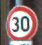

(1, 32, 32, 3)
1/1 [==============================] - 1s 770ms/step
Cnn Model output: Speed limit (30km/h)
ResNet Model output: Speed limit (30km/h)


In [68]:
imgSrc=["Test/00001.png"]

cnnOut,reOut=providePrediction(imgSrc[0])
print("Cnn Model output:",class_lables[cnnOut[0]])
print("ResNet Model output:",class_lables[reOut[0]])

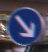

(1, 32, 32, 3)
1/1 [==============================] - 0s 36ms/step
Cnn Model output: Keep right
ResNet Model output: Keep right


In [69]:
imgSrc=["Test/00002.png"]

cnnOut,reOut=providePrediction(imgSrc[0])
print("Cnn Model output:",class_lables[cnnOut[0]])
print("ResNet Model output:",class_lables[reOut[0]])